In [200]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import FreqDist
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
# nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [201]:
df = pd.read_csv('reviews_guitars.csv')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59048 entries, 0 to 59047
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          59048 non-null  int64 
 1   reviewerID      59048 non-null  object
 2   asin            59048 non-null  object
 3   reviewerName    59044 non-null  object
 4   unixReviewTime  59048 non-null  int64 
 5   category        59048 non-null  object
 6   description     59048 non-null  object
 7   title           59048 non-null  object
 8   brand           58483 non-null  object
 9   feature         59048 non-null  object
 10  rank            59048 non-null  object
 11  main_cat        59048 non-null  object
 12  similar_item    35380 non-null  object
 13  date            59044 non-null  object
 14  price           29338 non-null  object
 15  cat             59048 non-null  object
 16  review_text     59048 non-null  object
 17  rating_cat      59048 non-null  object
 18  time  

In [203]:
df.head(5)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time,clean_text
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,2005-01-19,not bad not good either try c number time alwa...
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,2004-10-05,everyone seehems get good instrumen get horrib...
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,2004-08-28,happy classy yammy c first guitar could not ha...
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,2004-08-16,want guitar approach purchase musical instrume...
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,2004-03-24,cost performance yamaha great ymaha instrument...


Text(0, 0.5, 'Number of Reviews')

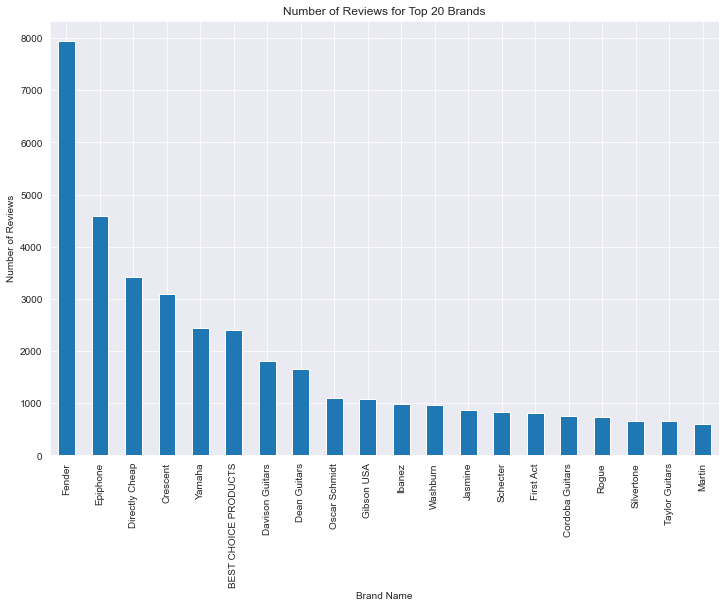

In [204]:
brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

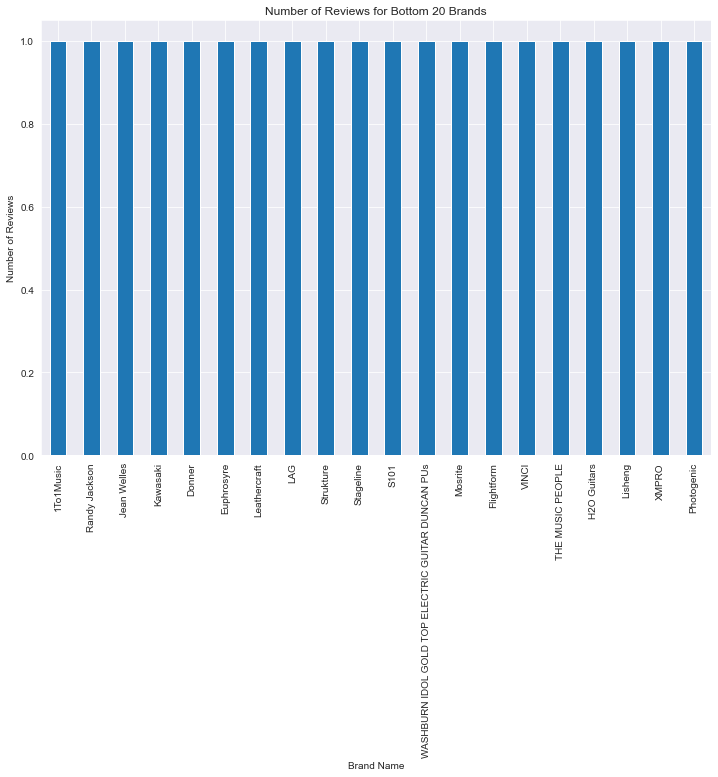

In [205]:
brands = df["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

In [206]:
df['title']= df['title'].str.replace('[&amp;,&quot;]', '')

Text(0, 0.5, 'Number of Reviews')

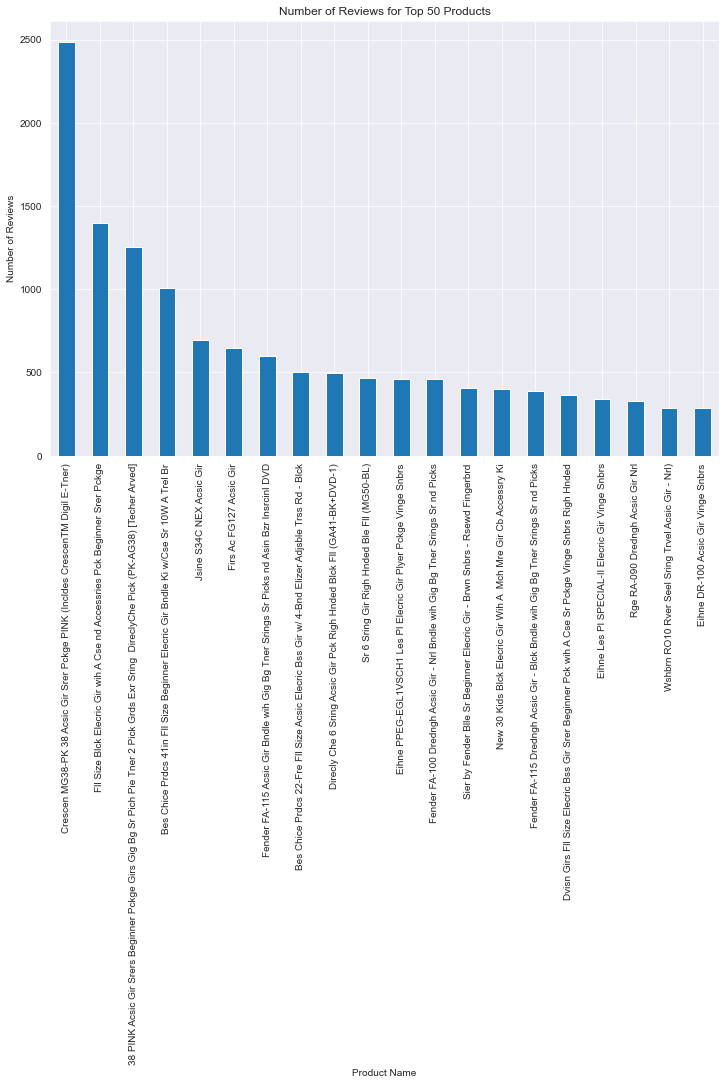

In [207]:
products = df["title"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')



In [212]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df = df.drop('time', axis = 1)
df.head(3)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,clean_text,year
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004


Text(0, 0.5, 'Mean Rating')

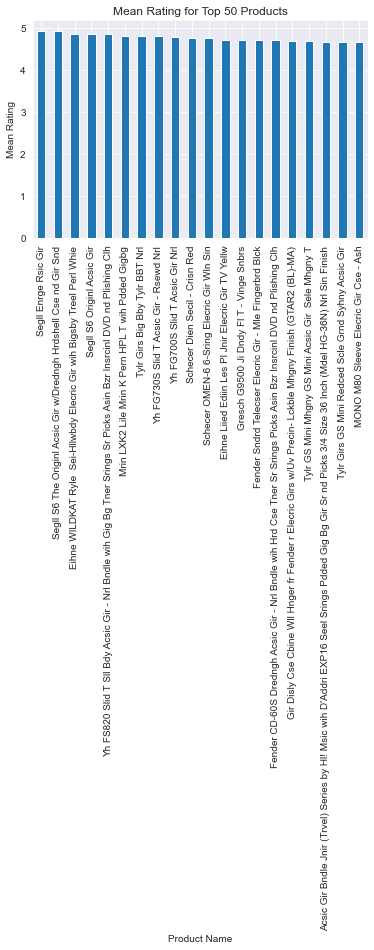

In [213]:
product = df[['title','year','Rating']]
product['count'] = product.groupby('title')['year'].transform('count')
product = product.drop(product[(product['count'] < product['count'].median())].index)
diff = product.groupby((product['title'])).Rating.mean().sort_values(ascending=False)
diff[:20].plot(kind='bar')
plt.title("Mean Rating for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Mean Rating')


Text(0, 0.5, 'Mean Rating')

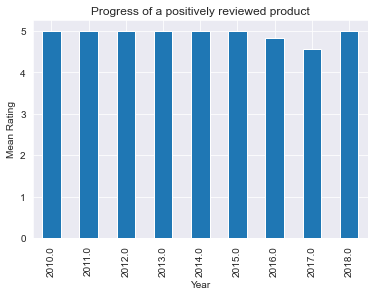

In [214]:
product = df[df['title'] == "Segll Enrge Rsic Gir"]
product = product[['year','Rating']] 
diff = product.groupby(np.floor(product['year'])).Rating.mean()
diff.plot(kind='bar')
plt.title("Progress of a positively reviewed product")
plt.xlabel('Year')
plt.ylabel('Mean Rating')

Text(0, 0.5, 'Mean Rating')

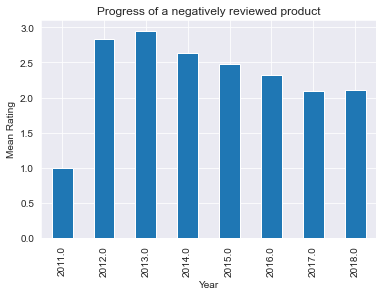

In [215]:
product = df[df['title'] == "Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL)"]
product = product[['year','Rating']] 
diff = product.groupby(np.floor(product['year'])).Rating.mean()
diff.plot(kind='bar')
plt.title("Progress of a negatively reviewed product")
plt.xlabel('Year')
plt.ylabel('Mean Rating')

In [216]:
low_1 = df[(df['asin']=="B00004UE2D")]
low_1

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,clean_text,year
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,want guitar approach purchase musical instrume...,2004
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,cost performance yamaha great ymaha instrument...,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33795,5,A10UWVJZRAJFA9,B00004UE2D,Dr. Bum,1514678400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The PERFECT AFFORDABLE CLASSICAL GUITAR! Could...,good,perfect affordable classical guitar could not ...,2017
33796,4,A3DT2L7189B5R4,B00004UE2D,Sandra Linebarier,1512432000,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Inst

In [217]:
apple_fplot = low_1.groupby(['unixReviewTime'])['Rating'].mean()
apple_fplot

unixReviewTime
975369600     5
1080086400    5
1092614400    4
1093651200    5
1096934400    1
             ..
1515283200    5
1517270400    5
1523232000    2
1524787200    4
1525046400    2
Name: Rating, Length: 104, dtype: int64

In [218]:
print(low_1['review_text'][1])

Everyone seems to get good instrumen I got horrible sample It seems to me everyone got exceptional instrument except me.  I don't understand what's so great about this guitar.  Action is just horrible.  I mean, look at 12 fret its 10 millimeters.  I don't know much about classical but it is not what I would call great playability.  Of course, you can play on this guitar, I do.  But it's hard.  I suppose, one shouldn't expect much from $100 dollars instrument.  But I repeat, it's not great.  Now about bass strings.  They sound bassy, as I suppose, they must.  But the thing is their bassines overpower trebles. Trebles sound unproportionally weak. And yes, yes.  I did changed strings on a good ones (D-Adario normal tension something) upon getting this guitar from Amazon  I should say though that guitar starts to sound much better now than it was when I just got it.  But action on this instrument still kills my fingers.  I do finger pushups in order to develop muscle on my phalanges, in or

In [219]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in low_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[5])

['yamaha', 'cr', 'classic', 'guitar', 'buy', 'guitar', 'son', 'love', 'much', 'play', 'great', 'sound', 'great']


In [220]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

Total words : 1298


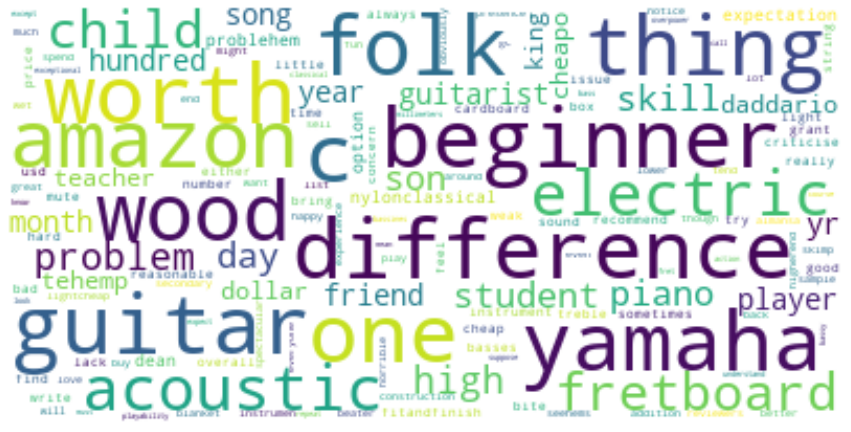

In [221]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total words :",len(all_words4))

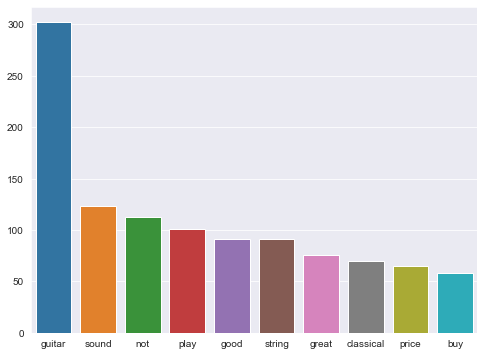

In [222]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [223]:
low_2 = df[(df['asin']=="B004NFTAPY") & (df['Rating']<3)]
low_2

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,clean_text,year
17809,1,AORSEC5O059LX,B004NFTAPY,Glenn Sanders,1324080000,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...","broke within an hour unfortunately, this thing...",bad,break within hour unfortunately thing total ju...,2011
17810,1,A3JUK3QO5X21R4,B004NFTAPY,JF,1317945600,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...",Horrible. This toy is horrible. I only gave it...,bad,horrible toy horrible give star comment box wo...,2011
17812,1,A30RZDCL6QW4Q3,B004NFTAPY,jesse mazarelli,1519689600,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...",One Star We received this is three different p...,bad,one star receive three different piece cheap,2018
17813,1,A3GSXWMLTZ0OCA,B004NFTAPY,Susan Deveau,1518998400,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...",Poor quality Didnt last a week could never tun...,bad,poor quality didnt last week could never tune ...,2018
17814,1,A14U2KFWAKPCNV,B004NFTAPY,Melissa,1518652800,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...","One Star Junk, the whole guitar fell apart aft...",bad,one star junk whole guitar fell apart tighten ...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43969,1,A1BTC4I3WG0GVO,B004NFTAPY,Dana Angelica,1523923200,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2011",$0.91,"Musical Instruments,Guitars,Acoustic Guitars,S...",One Star Horrible strings don't stay tight not...,bad,one star horrible string not stay tight not go...,2018
43970,2,A15SJ3G26SOI6F,B004NFTAPY,Amazon Customer,1523491200,"['Musical Instruments', 'Guitars', 'Acoustic G...",['Star MG50-BL Kids Acoustic Toy Guitar 23-Inc...,Sr 6 Sring Gir Righ Hnded Ble Fll (MG50-BL),Star,"['23 Inches Acoustic Toy Guitar Set', 'Ideal f...","['>#11,897 in Musical Instruments (See Top 100...",Musical Inst

In [224]:
print(low_2['review_text'][43974])

One Star Horrible quality!!
Strings brake on the first touch of them


In [225]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in low_2['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[5])

['terrible', 'product', 'not', 'expect', 'much', 'price', 'terrible', 'product', 'not', 'expect', 'much', 'price', 'disappoint', 'unable', 'tune', 'string', 'break', 'son', 'not', 'even', 'get', 'hardly', 'play']


In [226]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

Total words : 1039


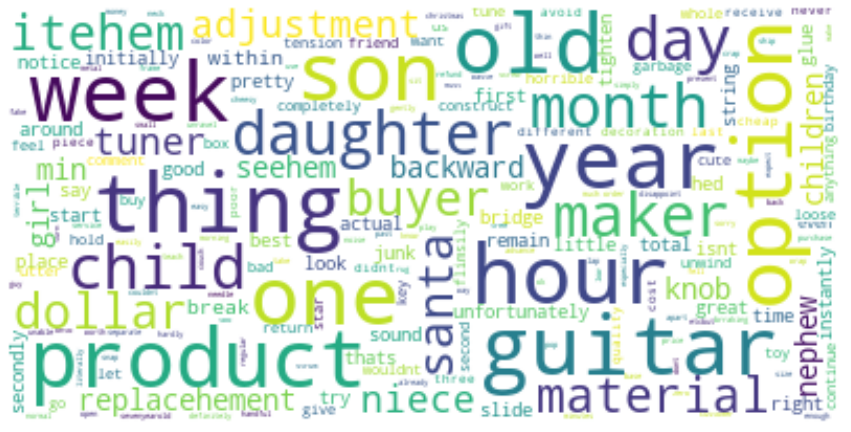

In [227]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total words :",len(all_words4))

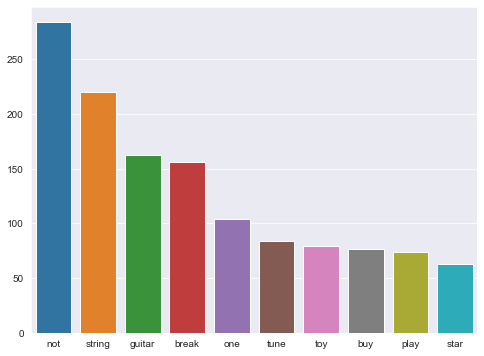

In [228]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

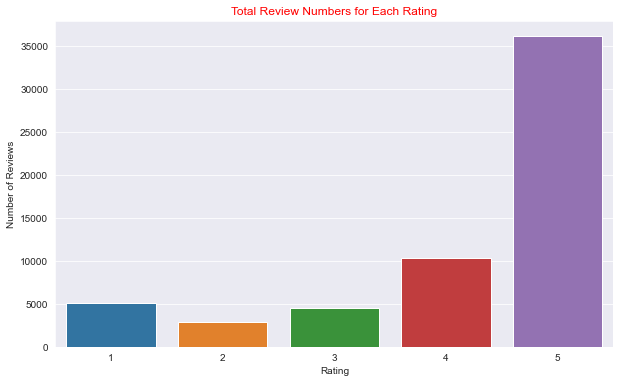

5    36163
4    10393
1     5068
3     4532
2     2892
Name: Rating, dtype: int64

In [229]:
plt.figure(figsize = (10,6))
sns.countplot(df['Rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['Rating'].value_counts()

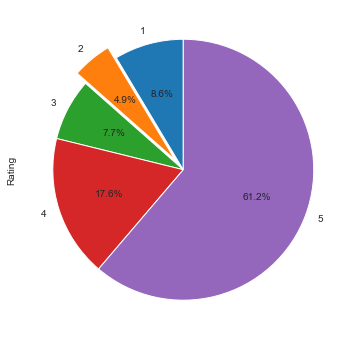

In [230]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('Rating').Rating.count()
df.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [231]:
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))

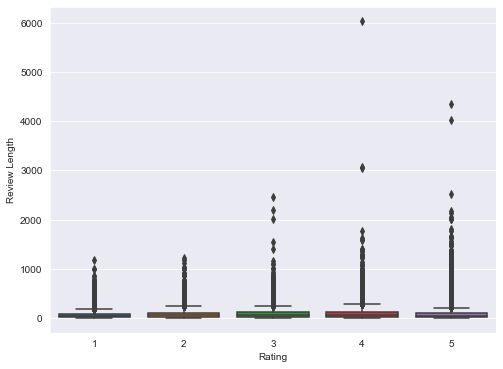

In [232]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

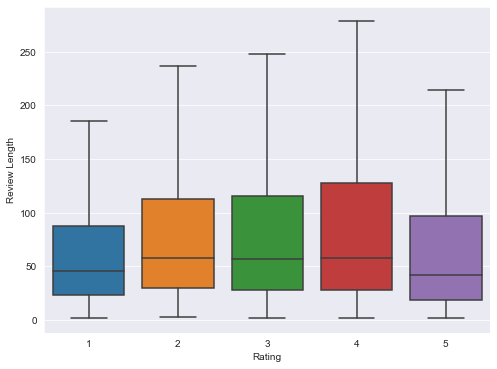

In [233]:
plt.figure(figsize = (8,6))

sns.boxplot(x="Rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

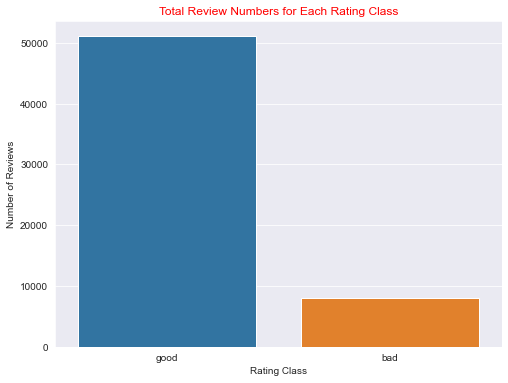

good    51088
bad      7960
Name: rating_cat, dtype: int64

In [234]:
plt.figure(figsize = (8,6))
sns.countplot(df['rating_cat'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_cat'].value_counts()

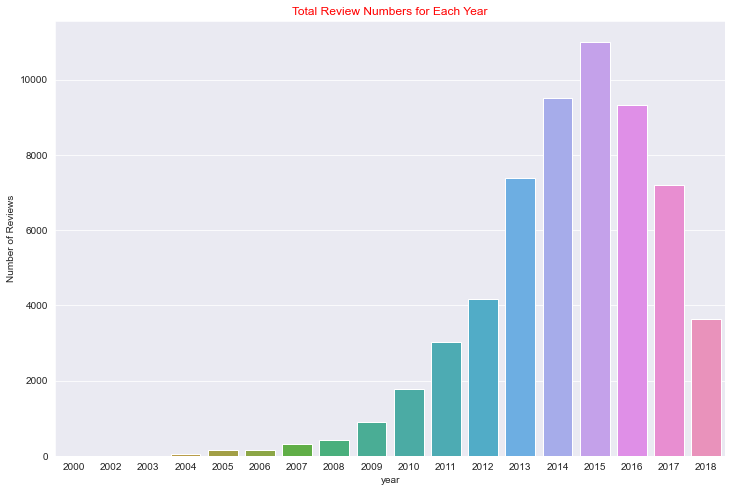

2015    11012
2014     9507
2016     9330
2013     7396
2017     7199
2012     4170
2018     3625
2011     3023
2010     1788
2009      905
2008      420
2007      314
2005      150
2006      143
2004       60
2003        4
2002        1
2000        1
Name: year, dtype: int64

In [235]:
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

In [236]:
print('Number of unique customers: {}'.format(len(df['reviewerID'].unique())))

Number of unique customers: 53467


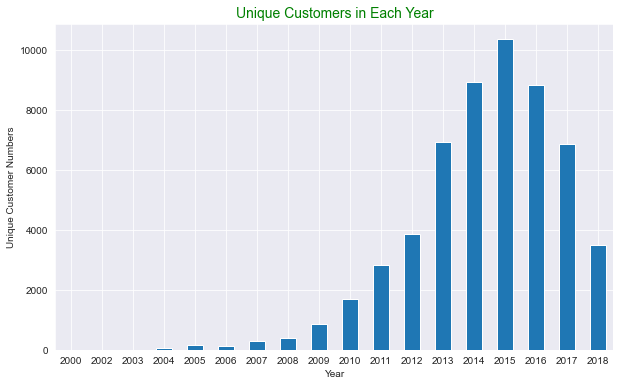

year
2000        1
2002        1
2003        4
2004       58
2005      146
2006      141
2007      305
2008      393
2009      860
2010     1682
2011     2815
2012     3873
2013     6927
2014     8941
2015    10356
2016     8829
2017     6865
2018     3506
Name: reviewerID, dtype: int64


In [237]:
unique_cust = df.groupby('year')['reviewerID'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

print(unique_cust)

In [238]:
a = list(df.groupby(['rating_cat'])['reviewerID'].unique())  

a2 = [len(a[0]),len(a[1])] 

b = list(df['rating_cat'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_category': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_category  number_of_customers  number_of_reviews
0             bad                 7753               7960
1            good                46323              51088


In [239]:
print('Number of unique guitar-related instruments products: {}'.format(len(df['asin'].unique())))

Number of unique guitar-related instruments products: 7570


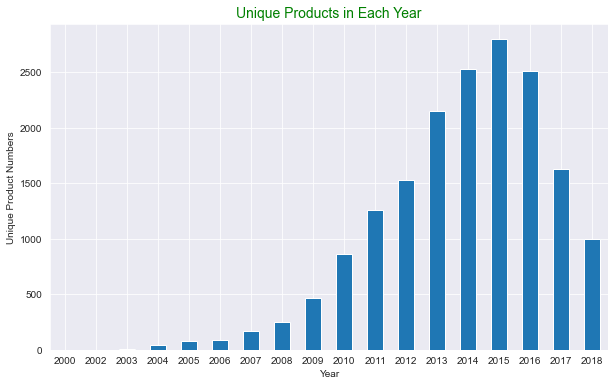

year
2000       1
2002       1
2003       3
2004      41
2005      78
2006      90
2007     168
2008     246
2009     464
2010     865
2011    1258
2012    1529
2013    2154
2014    2533
2015    2798
2016    2509
2017    1631
2018     999
Name: asin, dtype: int64


In [240]:
unique_prod = df.groupby('year')['asin'].nunique()


plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()


print(unique_prod)

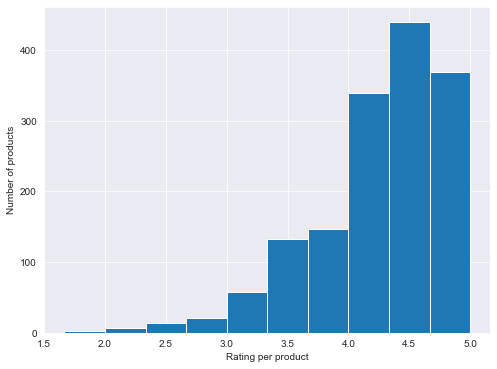

In [241]:
plt.figure(figsize = (8,6))

df1 = df.copy()
df1 = df1[np.isfinite(df1['Rating'])]
grp = df1.groupby('asin')
counts = grp.asin.count()        # number of reviews by each critic
means = grp.Rating.mean()     # average freshness for each critic

means[counts > 5].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Rating per product")
plt.ylabel("Number of products")
plt.show()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

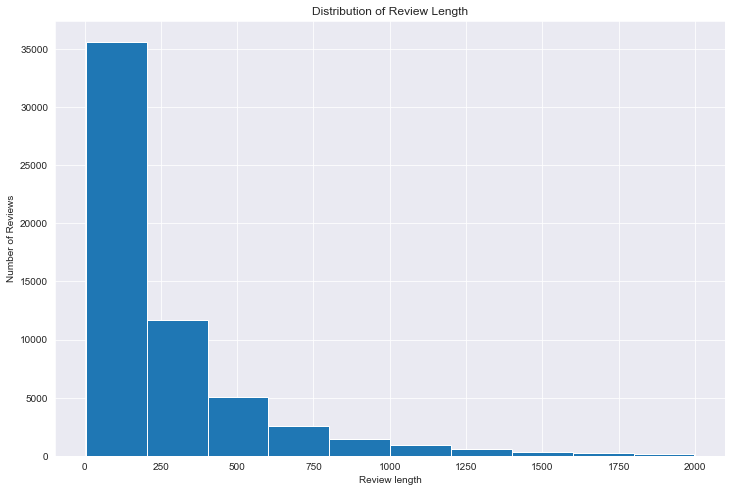

In [242]:
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

In [243]:
df['rating_category'] = df['rating_cat'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_category':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_category mean'] = feature['rating_category mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2000,1,1,100.000000,0.004459
1,2002,1,1,100.000000,0.004459
2,2003,4,3,75.000000,0.013378
3,2004,60,53,88.333333,0.236343
4,2005,150,123,82.000000,0.548495
5,2006,143,119,83.216783,0.530658
6,2007,314,270,85.987261,1.204013
7,2008,420,361,85.952381,1.609810
8,2009,905,784,86.629834,3.496098
9,2010,1788,1603,89.653244,7.148272


<Figure size 864x576 with 0 Axes>

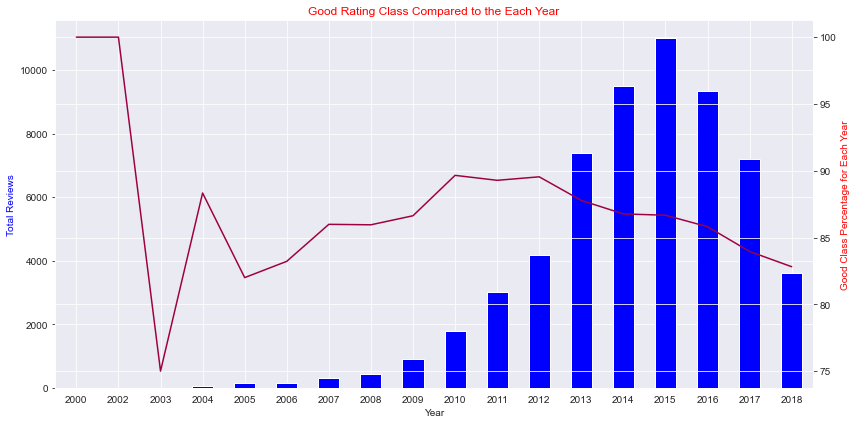

In [244]:
df['rating_category'] = df['rating_cat'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_category':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_category mean'] = feature['rating_category mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [245]:
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['clean_text'].dropna(inplace=True)
df['token'] = df['clean_text'].apply(token)

In [246]:
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,...,date,price,cat,review_text,rating_cat,clean_text,year,rating_category,token,review_length
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005,1,"[not, bad, not, good, either, try, c, number, ...",303
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004,0,"[everyone, seehems, get, good, instrumen, get,...",278
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004,1,"[happy, classy, yammy, c, first, guitar, could...",186


In [247]:
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,...,price,cat,review_text,rating_cat,clean_text,year,rating_category,token,review_length,review_length_bin
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005,1,"[not, bad, not, good, either, try, c, number, ...",303,"(300, 400]"
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004,0,"[everyone, seehems, get, good, instrumen, get,...",278,"(200, 300]"
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004,1,"[happy, classy, yammy, c, first, guitar, could...",186,"(100, 200]"
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,want guitar approach purchase musical instrume...,2004,1,"[want, guitar, approach, purchase, musical, in...",663,"(600, 700]"
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,cost performance yamaha great ymaha instrument...,2004,1,"[cost, performance, yamaha, great, ymaha, inst...",296,"(200, 300]"


In [248]:
per_pos_length = df.groupby(['review_length_bin'])['rating_category'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         86.172881
(100, 200]       85.425987
(200, 300]       89.174412
(300, 400]       90.023474
(400, 500]       90.034762
(500, 600]       91.257996
(600, 700]       91.830065
(700, 800]       92.857143
(800, 900]       87.962963
(900, 1000]      94.117647
(1000, 1100]     93.877551
(1100, 1200]     83.870968
(1200, 1300]     87.500000
(1300, 1400]     93.333333
(1400, 1500]     84.615385
(1500, 1600]    100.000000
(1600, 1700]    100.000000
(1700, 1800]    100.000000
(1800, 1900]    100.000000
(1900, 2000]    100.000000
(2000, 2100]    100.000000
(2100, 2200]    100.000000
(2200, 2300]    100.000000
(2300, 2400]           NaN
(2400, 2500]    100.000000
(2500, 2600]    100.000000
(2600, 2700]           NaN
(2700, 2800]           NaN
(2800, 2900]    100.000000
(2900, 3000]           NaN
(3000, 3100]    100.000000
(3100, 3200]           NaN
(3200, 3300]           NaN
(3300, 3400]           NaN
(3400, 3500]           NaN
(3500, 3600]    100.000000
(3600, 370

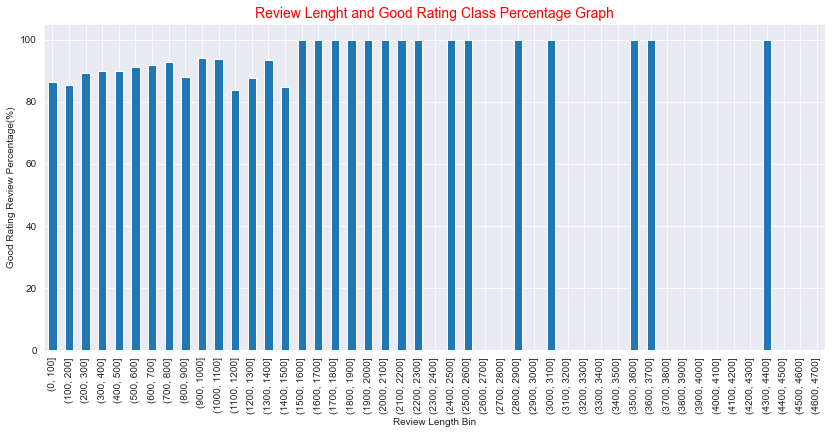

In [249]:
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

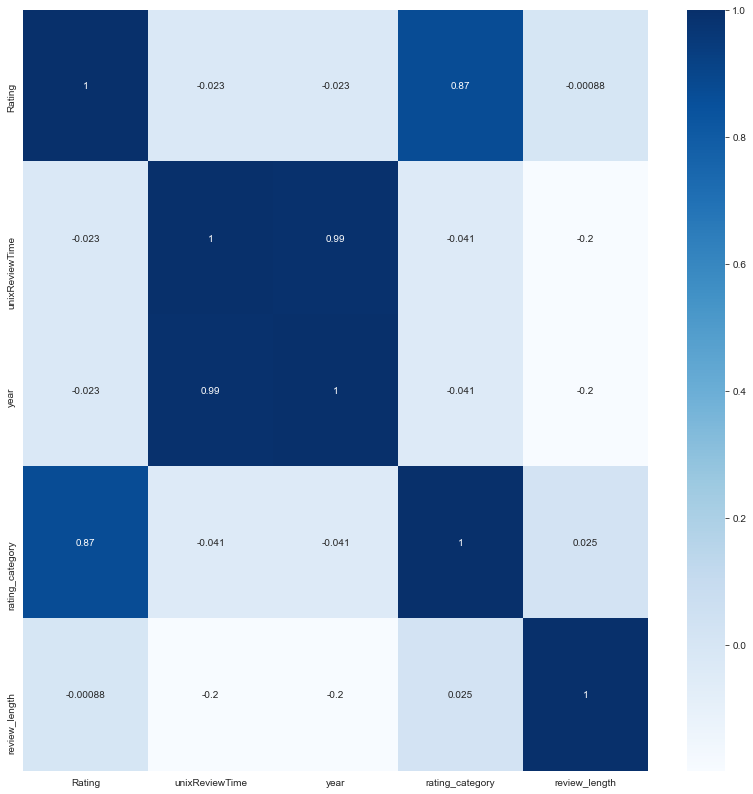

In [250]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

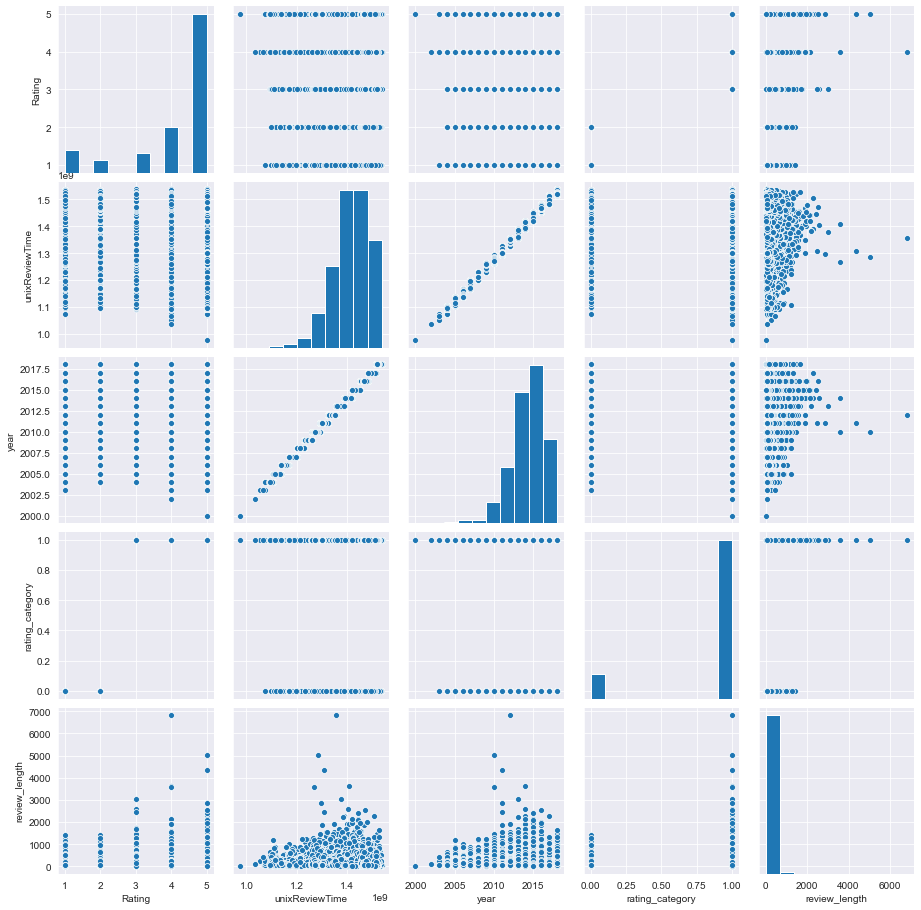

In [251]:
sns.pairplot(df)

In [252]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_cat'] == 'good')].index)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49070 entries, 1 to 59047
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             49070 non-null  int64 
 1   reviewerID         49070 non-null  object
 2   asin               49070 non-null  object
 3   reviewerName       49067 non-null  object
 4   unixReviewTime     49070 non-null  int64 
 5   category           49070 non-null  object
 6   description        49070 non-null  object
 7   title              49070 non-null  object
 8   brand              48619 non-null  object
 9   feature            49070 non-null  object
 10  rank               49070 non-null  object
 11  main_cat           49070 non-null  object
 12  similar_item       29664 non-null  object
 13  date               49066 non-null  object
 14  price              25384 non-null  object
 15  cat                49070 non-null  object
 16  review_text        49070 non-null  objec

In [253]:
df4 = df3.drop(df3[(df3['year'] < 2010)].index)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47679 entries, 6 to 59047
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             47679 non-null  int64 
 1   reviewerID         47679 non-null  object
 2   asin               47679 non-null  object
 3   reviewerName       47676 non-null  object
 4   unixReviewTime     47679 non-null  int64 
 5   category           47679 non-null  object
 6   description        47679 non-null  object
 7   title              47679 non-null  object
 8   brand              47302 non-null  object
 9   feature            47679 non-null  object
 10  rank               47679 non-null  object
 11  main_cat           47679 non-null  object
 12  similar_item       29254 non-null  object
 13  date               47675 non-null  object
 14  price              25133 non-null  object
 15  cat                47679 non-null  object
 16  review_text        47679 non-null  objec

In [254]:
df4 = df4.dropna()

In [255]:
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20771 entries, 6 to 59041
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             20771 non-null  int64 
 1   reviewerID         20771 non-null  object
 2   asin               20771 non-null  object
 3   reviewerName       20771 non-null  object
 4   unixReviewTime     20771 non-null  int64 
 5   category           20771 non-null  object
 6   description        20771 non-null  object
 7   title              20771 non-null  object
 8   brand              20771 non-null  object
 9   feature            20771 non-null  object
 10  rank               20771 non-null  object
 11  main_cat           20771 non-null  object
 12  similar_item       20771 non-null  object
 13  date               20771 non-null  object
 14  price              20771 non-null  object
 15  cat                20771 non-null  object
 16  review_text        20771 non-null  objec

In [258]:
df4.to_csv('Cleaned_Reviews_electronics_headphones.csv', sep=',')